In [57]:
import jieba
import re
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
import os
from os import path

# 1. What is the main content of lifestyle on Jianshu theme website?

After analyzing of almost 500 article titles regarding lifestyle, we can see the most popular words via wordcloud. Since these articles are published from Oct.2018 to Nov.2018, you can see '双十一' is the most popular word (Due to the limitation of jieba, it can only present '双十' here.) Then, '攻略', '测评', '单品', '指南' are the words that always be mentioned, which means people are likely to get more advice regarding selecting products from articles, in order to make their life better.

In [58]:
with open('js_headline.txt',encoding='utf-8',errors='ignore') as f:
    word = f.read()
    resultword = re.sub("[A-Za-z0-9\[\“\”\：\（\）\——\？\、\，\?\`\~\!\@\#\$\^\&\*\(\)\=\|\{\}\'\:\;\'\,\[\]\.\<\>\/\?\~\！\@\#\\\&\*\%]","",word)
    wordlist_after_jieba = jieba.cut(resultword)
    wl_space_split = " ".join(wordlist_after_jieba)
    wordlist = wl_space_split.split()

In [59]:
wordCount = {}
for word in wordlist:
    if word in wordCount:
        wordCount[word] = wordCount[word]+1
    else:
        wordCount[word] = 1
        
with open('stopwords.txt',encoding='utf-8',errors='ignore') as f:
    stopwords = f.read().split()
    stopwords.extend(['到','这','一个','最','与','个','人','这样','这么','从','哪些','去','要','还','很','啦','怎么','却'])
    for word in stopwords:
        if word in wordCount:
            del wordCount[word]

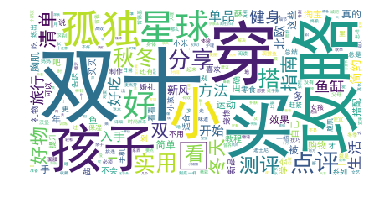

<Figure size 10080x5040 with 0 Axes>

In [60]:
font = 'SimHei.ttf'
wc = WordCloud (font_path=font,background_color = 'white', max_words=1000,max_font_size=100, random_state=50)
wc.generate_from_frequencies(wordCount)
wc.to_file("image.png")

plt.imshow(wc)
plt.axis('off')
plt.figure(figsize=(140,70))
plt.show()

# 2. The word count of articles

Through the bar charts we can find that the word count of most articles is 2000. The percentage is 343/450=76%.

In [61]:
df = pd.read_csv('jianshuplus.csv',encoding="gb2312")

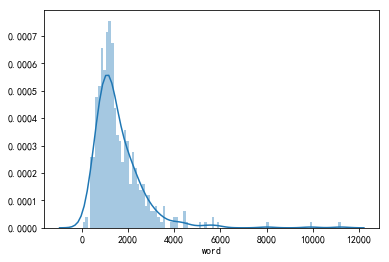

In [62]:
import seaborn as sns
sns.distplot(df["word"],bins=100)

In [63]:
df[(df['word']<=2000)]

,headline,nickname,abstract,website,time,word,view,like
0,鱼缸硝化细菌三大天敌，一个不起眼，一个很刺眼，还有一个很霸道,哗仔说鱼,对不起，我是哗仔！ 欢迎大家再一次回到这个有点不一样的哗仔说鱼专栏。 今天我们来聊一聊硝化细...,https://www.jianshu.com/p/246e86fb35a5,2018.11.18 17:34,1477,18,0
1,最后的湖宴,苏州的蔷薇花开,一个星期前，接到小明哥的邀请，说是约了一帮朋友这个星期天去太湖中吃蟹。这里的太湖指的是戗港边...,https://www.jianshu.com/p/bb8b443408a8,2018.11.18 16:49,1097,160,3
2,这些有趣的居家小物，送给你生活里中的小确幸,送什么礼物,"有时候逛淘宝，看到一些有趣的居家小物,会仍不住惊叹，这也太有趣太可爱了吧 也不禁感慨缺的不是...",https://www.jianshu.com/p/26a113b99ba4,2018.11.17 23:30,626,36,1
3,拿什么拯救你，我的开放式空间？,收了纳个Queen,“空间不一定装满东西叫利用，留白也很重要。就像心灵，不能太空也不能太满。” 如此经典的话语不...,https://www.jianshu.com/p/cd14a292e1d6,2018.11.17 22:18,1223,27,1
5,OK彩铅教程 | 鸡蛋，鸡蛋，咯咯哒！,OK小画,我每天早餐都会吃一只水煮蛋，这个习惯已经持续了3年。 话说达芬奇小时候刚学画时，老师让他每天...,https://www.jianshu.com/p/df63a323d2a0,2018.11.17 18:32,810,12,3
7,哪些成分， 更易致粉刺・ 痘痘？,莫嫡Morettie,【引子】 昨天的文章里提到了3种油有不同的致粉刺率 摩洛哥阿甘油 0橄榄油 2椰子油 4 致...,https://www.jianshu.com/p/52d90860401a,2018.11.18 09:22,913,166,19
8,真正的无门槛减肥运动！3个月撑过这4个阶段，再次上秤有惊喜,波普董健身,这样跑步3个月身体就会出现变化，但你能撑过这4个阶段吗？ 减肥难吗？ 挺难的，不然怎么会有那...,https://www.jianshu.com/p/ac6059df0792,2018.11.18 08:39,1157,41,2
9,孤独星球―绘画锦鲤，愿好运常伴,阳阳君,朋友经常说我是一个跟时代脱节的人，一些现在比较热门的网络词语跟人气明星，基本上都需要百度来理...,https://www.jianshu.com/p/6bc289ec213d,2018.11.17 23:22,927,74,6
10,吃货回娘家,苏州的蔷薇花开,这个月比较忙，一晃有一个月没回过娘家了，昨天和小姑聊天，她说也是一个月没有回娘家了，于是约好...,https://www.jianshu.com/p/ff8021c532fe,2018.11.17 21:58,637,157,4
11,好吃又补脑的核桃黑芝麻酥，原来如此简单,惠顾星辰,双十一网购的薄皮核桃终于到货啦，一大纸箱，又便宜又新鲜。 核桃既能生吃，也可炒食，还可以榨油...,https://www.jianshu.com/p/dd99532d5e64,2018.11.17 20:55,878,66,6


We can still find the articles which their word count are beyond 5000.

In [64]:
df[(df['word']>=5000)]

,headline,nickname,abstract,website,time,word,view,like
67,如何教人骑自行车,ThunderFox,如何教人骑自行车 共享单车遍布大疆南北，但是真心不好骑，拿来练车倒是很不错的选择。作为攻城狮...,https://www.jianshu.com/p/25b608943728,2018.11.14 11:04,8012,41,1
80,我对澳门上瘾了！72小时最强攻略，建议你果断收藏...,美好小姐的礼物清单,这是一份补交的攻略！ 前几日子去南方，除了在深圳呆了好几天（吃喝玩乐买礼物，这里有一份值得你...,https://www.jianshu.com/p/cc415a484172,2018.11.13 09:39,5627,15856,222
90,总是感冒?睡不好?精神不佳？你很可能是营养不良! (中),一稼哈佛MBA,一稼： 在上周发布的营养篇（上），我们提到营养不是吃了什么，而是吸收了什么，而现代人很多健康...,https://www.jianshu.com/p/565b13b22a85,2018.11.13 11:26,5356,37,1
189,桂林，桂林（桂林深度旅行详细攻略）,旅行蛋,桂林，给世人的第一印象就是山水甲天下，来桂林玩就是游玩桂林山水的。但其实，秋已深，桂林还深藏...,https://www.jianshu.com/p/f443ec61e7da,2018.11.07 07:27,11217,307,12
194,健身综合教程（1）,巡月,写在前面 首先说明一点，我是一名健身爱好者，并非专业人士。而且在我看来没有在一个领域深耕多年...,https://www.jianshu.com/p/39230b88ebd8,2018.11.06 09:51,9910,653,22
264,杭州科目三路考细节攻略总结,穿石小水滴,"年纪一大把了考驾照,前面都顺风顺水走过来，科目三真是历尽艰难险阻，于是从第二次失败了开始，便...",https://www.jianshu.com/p/929c19594b1c,2018.10.31 13:54,5120,84,1
265,最高の料理 2！洛杉矶最强日本料理，原来身为「最」是这样的滋味！,美食一姐小浣熊Alice,公众号：LAfoodie， Instagram: lafoodiealice， 微博：洛杉矶...,https://www.jianshu.com/p/bd53ee685064,2018.10.25 12:55,5735,48,1
396,来了！双11预售清单来了！！,wsdhab,从预售前就开始被催了八百遍的双11预售清单，来了来了！ 昨天有同学迷茫的问我：蛮蛮，预售跟双...,https://www.jianshu.com/p/b1190b25ebba,2018.10.24 13:08,5902,85,1


# 3. The publish date of articles

During 2018.10.15--2018.11.18, there are different posting frequncy on each day. The highest posting frequency is on 2018.11.09, the day which close to 'Shopping Carnival' in China.

In [65]:
df['time2'] = pd.to_datetime(df['time']).dt.normalize()

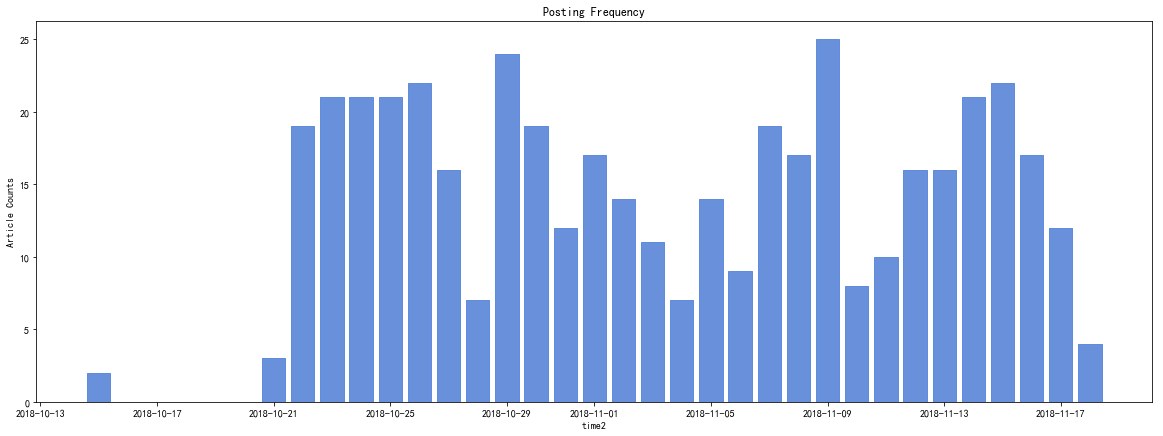

In [66]:
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 

time_counts=df['time2'].value_counts()[:30].sort_values(ascending=False) 
time2 = pd.DataFrame(time_counts)
fig = plt.figure(figsize=(20,7)) 
plt.bar(time2.index, time2.time2,color = '#6991db',edgecolor = '#5f8cde')

plt.title('Posting Frequency')
plt.xlabel('time2')
plt.ylabel('Article Counts')
plt.show()